In [1]:
import numpy as np
import pandas as pd
from PIL import Image as im
import matplotlib.pyplot as plt

In [2]:
"""test_df = pd.read_csv(r'D:\academics\SEM5\ML\PROJECT\test.csv')
test_new_df = []
for j in range(test_df.shape[0]):
    x = test_df['pixels'][j]
    x = x.split(' ')
    for i in range(len(x)):
        x[i] = int(x[i])
    test_new_df.append(x)
test_final_df = pd.DataFrame(test_new_df)
test_final_df.head()
test_final_df.to_csv('final_test.csv')"""

final_df = pd.read_csv(r'D:\academics\SEM5\ML\final_train.csv')

In [3]:
X = final_df.drop(columns = ['emotion'])
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,70,80,82,72,58,58,60,63,54,58,...,159,182,183,136,106,116,95,106,109,82
1,151,150,147,155,148,133,111,140,170,174,...,105,108,95,108,102,67,171,193,183,184
2,231,212,156,164,174,138,161,173,182,200,...,104,138,152,122,114,101,97,88,110,152
3,24,32,36,30,32,23,19,20,30,41,...,174,126,132,132,133,136,139,142,143,142
4,4,0,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


In [4]:
X = X.to_numpy()

In [5]:
X.shape

(28709, 2304)

In [6]:
x_temp = np.reshape(X,(28709,48,48,1))
x_temp = x_temp/255

In [7]:
x_temp[0]

array([[[0.2745098 ],
        [0.31372549],
        [0.32156863],
        ...,
        [0.20392157],
        [0.16862745],
        [0.16078431]],

       [[0.25490196],
        [0.23921569],
        [0.22745098],
        ...,
        [0.21960784],
        [0.20392157],
        [0.17254902]],

       [[0.19607843],
        [0.16862745],
        [0.21176471],
        ...,
        [0.19215686],
        [0.21960784],
        [0.18431373]],

       ...,

       [[0.35686275],
        [0.25490196],
        [0.16470588],
        ...,
        [0.28235294],
        [0.21960784],
        [0.16862745]],

       [[0.30196078],
        [0.32156863],
        [0.30980392],
        ...,
        [0.41176471],
        [0.2745098 ],
        [0.18039216]],

       [[0.30196078],
        [0.28235294],
        [0.32941176],
        ...,
        [0.41568627],
        [0.42745098],
        [0.32156863]]])

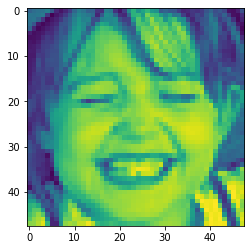

In [8]:
plt.imshow(x_temp[15212])

In [9]:
y = final_df['emotion']

In [10]:
y = y.to_numpy()

In [11]:
X.shape
print(y.shape)

(28709,)


In [12]:
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LinearRegression
#from sklearn.cross_validation import KFold  
from sklearn.model_selection import KFold 
#new versions of python support this, if old then use above comment 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, export_graphviz 
from sklearn import metrics 

In [13]:
def classification_model(model, data, predictors, outcome):  
    #Fit the model:  
    model.fit(predictors,outcome)    
    #Make predictions on training set:  
    predictions = model.predict(predictors)
    #Print accuracy  
    accuracy = metrics.accuracy_score(predictions,outcome)  
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds  
    #kf = KFold(5,shuffle=True)  
    #error = []  
    '''for train, test in kf.split(data):
        # Filter training data    
        train_predictors = (data[predictors].iloc[train,:]) 
        # The target we're using to train the algorithm.    
        train_target = data[outcome].iloc[train]        
        # Training the algorithm using the predictors and target.    
        model.fit(train_predictors, train_target)       
        #Record error from each cross-validation run    
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
    print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error))) '''
    # %s is placeholder for data from format, next % is used to conert it into percentage
    #.3% is no. of decimals

In [14]:
#model = LogisticRegression(max_iter = 500)
#classification_model(model,X,X,y)

#### USE X_TEMP FOR NEURAL NETWORKS and X for LOGISTIC REGRESSION

In [15]:
x_temp.shape

(28709, 48, 48, 1)

In [16]:
!pip install keras-utils

In [17]:
from keras import utils as np_utils

In [18]:
b = np.zeros((y.size, y.max()+1))
b[np.arange(y.size),y] = 1
b[0]

array([1., 0., 0., 0., 0., 0., 0.])

In [35]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()

In [36]:
model.add(Conv2D(256, kernel_size=3, activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

In [37]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
model.fit(x_temp[0:5000], b[0:5000], epochs=10)

Epoch 1/10
157/157 [==============================] - 153s 972ms/step - loss: 1.8075 - accuracy: 0.2498
Epoch 2/10
157/157 [==============================] - 161s 1s/step - loss: 1.7407 - accuracy: 0.2990
Epoch 3/10
157/157 [==============================] - 167s 1s/step - loss: 1.6552 - accuracy: 0.3536
Epoch 4/10
157/157 [==============================] - 176s 1s/step - loss: 1.5640 - accuracy: 0.3946
Epoch 5/10
157/157 [==============================] - 195s 1s/step - loss: 1.4431 - accuracy: 0.4538
Epoch 6/10
157/157 [==============================] - 234s 1s/step - loss: 1.1625 - accuracy: 0.5738
Epoch 7/10
157/157 [==============================] - 224s 1s/step - loss: 0.7386 - accuracy: 0.7302
Epoch 8/10
157/157 [==============================] - 188s 1s/step - loss: 0.3206 - accuracy: 0.8914
Epoch 9/10
157/157 [==============================] - 178s 1s/step - loss: 0.1171 - accuracy: 0.9654
Epoch 10/10
157/157 [==============================] - 176s 1s/step - loss: 0.0588 - acc